In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import PDB
from time import time
from tqdm import tqdm
%matplotlib inline

In [73]:
def center_atomic_coord (xi,yi,zi):
    return(xi-np.mean(xi), yi-np.mean(yi), zi-np.mean(zi))
    
def i_sel (x,xi,sigma,n):
    return (i for i in range(len(x)) if abs(x[i]-xi)<=n*sigma)
    
def new_exp_coordinates (xi, yi, zi, sigma, n, res):
    xi, yi, zi= center_atomic_coord (xi,yi,zi)
    x=np.linspace(min(xi)-1,max(xi)+1, res)
    y=np.linspace(min(yi)-1,max(yi)+1, res)
    z=np.linspace(min(zi)-1,max(zi)+1, res)
    X=np.zeros(len(xi)*len(x)).reshape((len(xi),len(x)))
    Y=np.zeros(len(xi)*len(x)).reshape((len(xi),len(x)))
    Z=np.zeros(len(xi)*len(x)).reshape((len(xi),len(x)))
    for a in range(len(xi)):
        iselected_x=list(i_sel(x,xi[a],sigma,n))
        iselected_y=list(i_sel(y,yi[a],sigma,n))
        iselected_z=list(i_sel(z,zi[a],sigma,n))
        #print(iselected)
        for i in range(len(x)):
            if i<iselected_x[0] or i>iselected_x[-1]:
                pass
            else:
                X[a,i]=np.exp(-0.5*(((x[i]-xi[a])/sigma)**2))
            if i<iselected_y[0] or i>iselected_y[-1]:
                pass
            else:
                Y[a,i]=np.exp(-0.5*(((y[i]-yi[a])/sigma)**2))
            if i<iselected_z[0] or i>iselected_z[-1]:
                pass
            else:
                Z[a,i]=np.exp(-0.5*(((z[i]-zi[a])/sigma)**2))
    return(X,Y,Z)

def Ical_gen (xi, yi, zi, sigma, n, res, plane):
    X,Y,Z=new_exp_coordinates (xi, yi, zi, sigma, n, res)
    if plane=="xy":
        I_gen=( np.tensordot(X[a], Y[a], 0) for a in range(len(xi)) )
        return(np.sqrt(2*np.pi)*sigma*sum(I_gen))
    elif plane=="xz":
        I_gen=( np.tensordot(X[a], Z[a], 0) for a in range(len(xi)) )
        return(np.sqrt(2*np.pi)*sigma*sum(I_gen))
    elif plane=="yz":
        I_gen=( np.tensordot(Y[a], Z[a], 0) for a in range(len(xi)) )
        return(np.sqrt(2*np.pi)*sigma*sum(I_gen))
    else:
        print('Invalid plane selection. The options are "xy", "xz" and "yz".')

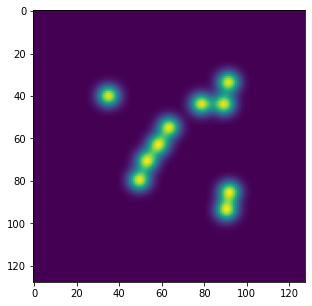

In [80]:
#Example: 10 atoms in random coordinates
n=3                         #Sigma times
res=128                     #Resolution
sigma=1*10**(-1)            #Standar deviation of the Gaussians

xi=np.random.random(10) * 2 - 1   #x random atomic coordinates
yi=np.random.random(10) * 2 - 1   #y random atomic coordinates
zi=np.random.random(10) * 2 - 1   #y random atomic coordinates

plt.imshow(Ical_gen(xi, yi, zi, sigma, n, res, "xz")) #Graph

In [75]:
#Importation of the 1xck's PDB to extract XYZ atomic coordinates
parser = PDB.PDBParser()
io = PDB.PDBIO()
struct = parser.get_structure('1xck','1xck.pdb')
x_coord=[]
y_coord=[]
z_coord=[]
for chains in struct:
    for chain in chains:
        for residue in chain:                             
            for atom in residue:
                x_coord.append(atom.get_vector()[0])
                y_coord.append(atom.get_vector()[1])
                z_coord.append(atom.get_vector()[2])
X_coord=np.array(x_coord)
Y_coord=np.array(y_coord)
Z_coord=np.array(z_coord)

C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 56763.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 56800.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 56858.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 56887.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 56921.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 56979.
  warnings.warn(
C:\Users\A

Execution time (sec)= 24.929200410842896  sec
Execution time (min)= 0.4154866735140483  min
Execution time (hours)= 0.006924777891900804  hours


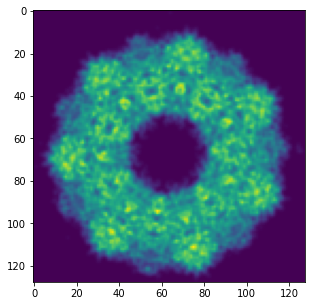

In [77]:
start_time=time()
## Parameters
n=3                #Sigma times
sigma=1            #Standar deviation of the Gaussians
plane="xz"         #Projection plane
res=128            #Grid's resolution

## Atomic Coordinates
xi=X_coord         
yi=Y_coord         
zi=Z_coord 

## Calculation and Graph of I(plane)

Ic=Ical_gen(xi, yi, zi, sigma, n, res, plane) #I calculated on the projected plane
#np.savetxt("Ical_1xck_tens_sigma_{}_res_{}_{}.txt".format(sigma,res,plane), Ic, fmt="%s")
plt.imshow(Ic)
plt.rcParams["figure.figsize"] = (5,5)
#plt.savefig("Ical_1xck_tens_sigma_{}_res_{}_{}.png".format(sigma,res,plane))
final_time=time()-start_time
print("Execution time (sec)=", final_time," sec")
print("Execution time (min)=", final_time/60," min")
print("Execution time (hours)=", final_time/3600," hours")